#### 順序統計量の確率分布
- 独立に区間$[0, 1]$の一様分布に従う $v_i$ を小さい順（昇順）に並べ直して，改めて番号を振り直したものを，
  $v_{(k)}$ で表す。

- つまり，$k = 1, \ldots, n$について，$v_{(k)}$の大小関係は次のようになる。
  $$
  v_{(1)} \leq v_{(2)} \leq \ldots \leq v_{(n)}
  $$

- このように確率分布から発生した標本（これも確率変数となる）を順番に並べ直すルールを設けたとき， 
  並べ直した後の確率変数$v_{(k)}$を順序統計量（order statistic）と呼ぶ。

- 上記の並べ直すルールがあることによって，順序統計量 $v_{(k)}$ が従う確率分布は，もともとの確率分布と異なるものになる。

- 第$k$順序統計量の確率密度関数は次のベータ分布となる。
  $$
  \begin{aligned}
  f_{v_{(k)}}(v) & = \dfrac{n!}{(k-1)!(n-k)!} v^{k-1}(1-v)^{n-k} 
                  = \dfrac{1}{B(k, n-k+1)} v^{k-1}(1-v)^{n-k} 
  \end{aligned}
  $$

- ここで，係数$B(k, n-k+1)$は，ベータ関数と呼ばれ，次のように定義される。
  $$
  \begin{aligned}
      B(a, b) = \int_0^1 u^{a-1} (1-u)^{b-1} du
  \end{aligned}
  $$

- 以下のプログラムでは，2種類の方法で順序統計量の標本を取得し，そのヒストグラムをプロットする。
  - 定義どおりに一様分布に従う標本値を並べなおして，$k$番目の標本値のみを順序統計量の標本値として抽出する。
  - ベータ分布に従う標本値を [`scipy.stats.beta.rvs()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) で取得する。

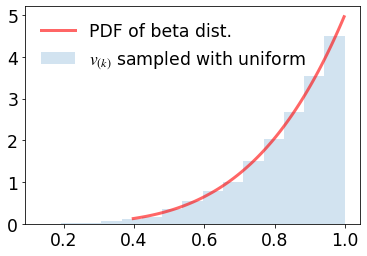

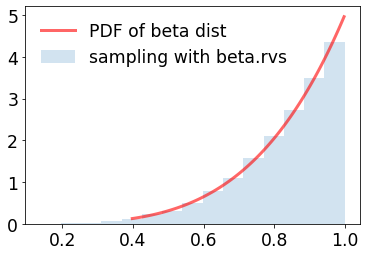

In [1]:
import numpy as np
from scipy.stats import uniform, beta
import matplotlib.pyplot as plt

n = 5 
num_repeat = 10000 #3 #
vmin, vmax = (0, 1)
v_i = uniform.rvs(loc=vmin, scale=(vmax - vmin), size=(num_repeat, n))

sort_axis = 1
idx = np.argsort(v_i, axis=sort_axis)
k = 5 # order (starting from 1)
kz = k - 1 # order (starting from 0)
idx_k = np.expand_dims(idx[:, kz], axis=-1)

# sample of k-th order statistic
v_k = np.take_along_axis(v_i, idx_k, axis=sort_axis)

a = k
b = n - k + 1
vv = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
pdf_beta = beta.pdf(vv, a, b)

vv_k = beta.rvs(a, b, size=num_repeat)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'
plt.rcParams['legend.fontsize'] = 'xx-large'

plt.figure()
plt.plot(vv, pdf_beta, 'r-', lw=3, alpha=0.6, label='PDF of beta dist.')
plt.hist(v_k, bins=15, density=True, histtype='stepfilled', alpha=0.2, label='$v_{(k)}$ sampled with uniform')
plt.legend(loc='best', frameon=False)
plt.savefig('pdf_beta_vs_sample.pdf', bbox_inches='tight')

plt.figure()
plt.plot(vv, pdf_beta, 'r-', lw=3, alpha=0.6, label='PDF of beta dist')
plt.hist(vv_k, bins=15, density=True, histtype='stepfilled', alpha=0.2, label='sampling with beta.rvs')
plt.legend(loc='best', frameon=False)